<a href="https://colab.research.google.com/github/X4D0/SNA_Facebook/blob/main/Project1_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


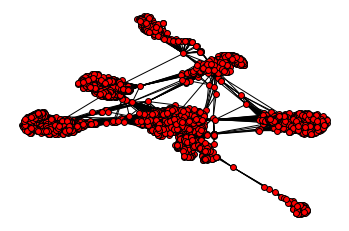

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read Edge List
G = nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/Dataset/facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# Show Network Info
print(nx.info(G))

# Visualize the Graph
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=35, node_color='r', edgecolors='black')
plt.show()


In [11]:
# Count every Nodes Degree and input to Dataframe.
def calculate_degree(G):
    listDeg = []
    listNode= []
    for node in G.nodes():
        temp = G.degree(node)
        listDeg.append(temp),listNode.append(node)
    return listDeg,listNode

degree, node = calculate_degree(G)   
data = {'Node': node,
        'Degree': degree}
dataframe = pd.DataFrame(data)
dataframe.sort_values(by=['Degree'], inplace=True, ascending=False)
print('Top 10 Influential User')
dataframe.head(10)

Top 10 Influential User


,Node,Degree
107,107,1045
351,1684,792
352,1912,755
1821,3437,547
0,0,347
1490,2543,294
2154,2347,291
1373,1888,254
1285,1800,245
1149,1663,235


In [10]:
# Calculate Degree Centrality of this Graph and input to Dataframe
df_dc = pd.DataFrame(dict(
    Degree = dict(G.degree),
    Degree_Centrality = nx.degree_centrality(G)
))
df_dc.sort_values(by=['Degree_Centrality'], inplace=True, ascending=False)
print('Top 10 Influential User')
df_dc.head(10)

,Degree,Degree_Centrality
107,1045,0.258791
1684,792,0.196137
1912,755,0.186974
3437,547,0.135463
0,347,0.085934
2543,294,0.072808
2347,291,0.072065
1888,254,0.062902
1800,245,0.060674
1663,235,0.058197


In [4]:
top = dataframe.iloc[0]
print("The Most influential User based on SNAP Facebook Dataset \nis Facebook Account with ID",top[0],"and have",top[1],"\nFriends in his/her Facebook Account")

def listTopFriends(user):
  topFriends = []
  for friends in G.neighbors(top[0]):
    topFriends.append(friends)
  return topFriends

temanInfluencer = listTopFriends(top[0])
dataTeman = {'Friends List': temanInfluencer}
df_friends = pd.DataFrame(dataTeman)
df_friends

The Most influential User based on SNAP Facebook Dataset 
is Facebook Account with ID 107 and have 1045 
Friends in his/her Facebook Account


,Friends List
0,0
1,58
2,171
3,348
4,353
...,...
1040,1907
1041,1908
1042,1909
1043,1910


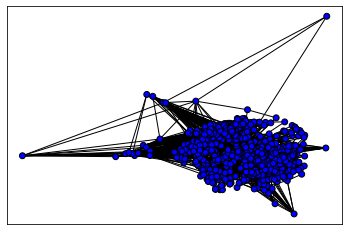

In [20]:
# Now Let's Draw the Influencer's Network
node = top[0]
topGraph = nx.ego_graph(G,node)
color_map = []
for node in topGraph:
    if node == top[0]:
        color_map.append('red')
    else: 
        color_map.append('blue')
nx.draw_networkx(topGraph, pos=pos, with_labels=False, node_size=35, node_color=color_map, edgecolors='black')